In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
import matplotlib.pyplot as plt
import os
import anndata
import harmonypy as hm
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from collections import defaultdict


%matplotlib inline

In [2]:
sc.settings.set_figure_params(dpi=150,fontsize=15)

In [3]:
adata_orig=sc.read_h5ad('/rds/general/user/snb20/projects/cardiac_single_cell_biology/live/sanger_covid19_snRNAseq/lung/lung_v2/object_anno/global_annotated_object_raw.h5ad')

In [4]:
adata = adata_orig

In [5]:
adata

AnnData object with n_obs × n_vars = 536120 × 34091
    obs: 'nCount_RNA', 'nFeature_RNA', 'cell.id', 'study.batch', 'donor', 'samples', 'sex', 'age', 'ethnicity', 'smoking_status', 'health_status', 'region', 'version_10X', 'scn_source', 'cell_type_bharat20', 'cell_states_bharat20', 'cell_type_delorey21', 'cell_states_delorey21', 'cell_type_melms21', 'cell_states_melms21', 'cell_type_SatijaAtlas', 'original_annotation', 'scn_source_study.batch', 'donor_study.batch', 'samples_study.batch', 'percent_mito', 'percent_ribo', 'scrublet.scores_samples', 'scrublet.predicted_db_samples', 'scDblFinder.score_samples', 'scDblFinder.predicted_db_samples', 'nCount_SCT', 'nFeature_SCT', 'cell_type_mid', 'cell_id', 'hca_anno_merged', 'cell_type', 'cell_state'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'cell_state_colors', 'cell_states_colors', 'cell_type_colors', 'donor_colors', 'health_status_colors'
    obsm: 'X_harmony', 'X_pca

In [6]:
def stacked_barplot(adata, xaxis, stack, xaxis_label, legend_label, shift_top=0.2, xaxis_rotation=45, figsize=(10,10), percent=True):
    tmp=pd.crosstab(adata.obs[xaxis],
                adata.obs[stack]).sum(axis=1)
   
    ax= pd.crosstab(adata.obs[xaxis],
                    adata.obs[stack]).apply(lambda r: r/r.sum()*100, axis=1)
    #ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0, colors=colors)
    ax_1 = ax.plot.bar(figsize=figsize,stacked=True, rot=0)
    #display(ax)
    #plt.legend(title="Subject") # loc='upper center', bbox_to_anchor=(0.1, 1.0),
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legend_label)
    plt.xlabel(xaxis_label,fontweight="bold")
    plt.ylabel('Percent Distribution',fontweight="bold")
   
    if percent:
        for rec in ax_1.patches:
            height = rec.get_height()
            ax_1.text(rec.get_x() + rec.get_width() / 2, rec.get_y() + height/2, "{:.0f}%".format(height),
                   ha = 'center', va='center', fontsize=14.5, weight='bold') #
   
    for xaxistick in range(ax.shape[0]):
        ax_1.text(xaxistick-shift_top,110,tmp[xaxistick],va='center', rotation=45, fontsize=14.5, weight='bold')
   
    plt.xticks(rotation=xaxis_rotation, ha = 'right')
   
    ax_1.grid(False)
    plt.show()

In [7]:
adata.obs.cell_type.value_counts()

Monocyte.Macrophage            212910
AT2                             63676
Vascular.Endothelial.cells      57915
Fibroblasts                     57332
T.NK.cells                      47357
AT1                             28293
B.Plasma.cells                  22068
Ciliated                        14938
Mural.cells                     12452
Secretory                        8866
Lymphatic.Endothelial.cells      5926
Mast                             4387
Name: cell_type, dtype: int64

In [8]:
adata_subset = adata[adata.obs["cell_type"].isin(["Vascular.Endothelial.cells","Lymphatic.Endothelial.cells"])]

In [9]:
adata_subset.obs.cell_state.value_counts()

EC.Capillary           25727
EC.Aerocyte            12383
EC.Arterial             6651
EC.Venous.Pulmonary     6534
EC.Lymphatic            5804
EC.Doublets             4666
EC.Venous.Systemic      2076
Name: cell_state, dtype: int64

In [10]:
adata_subset.obs['cell_state'].cat.reorder_categories(['EC.Arterial','EC.Capillary','EC.Aerocyte','EC.Venous.Pulmonary','EC.Venous.Systemic','EC.Lymphatic','EC.Doublets'],inplace=True)

/var/tmp/pbs.18819.pbs/ipykernel_1381001/3629369356.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_subset.obs['cell_state'].cat.reorder_categories(['EC.Arterial','EC.Capillary','EC.Aerocyte','EC.Venous.Pulmonary','EC.Venous.Systemic','EC.Lymphatic','EC.Doublets'],inplace=True)


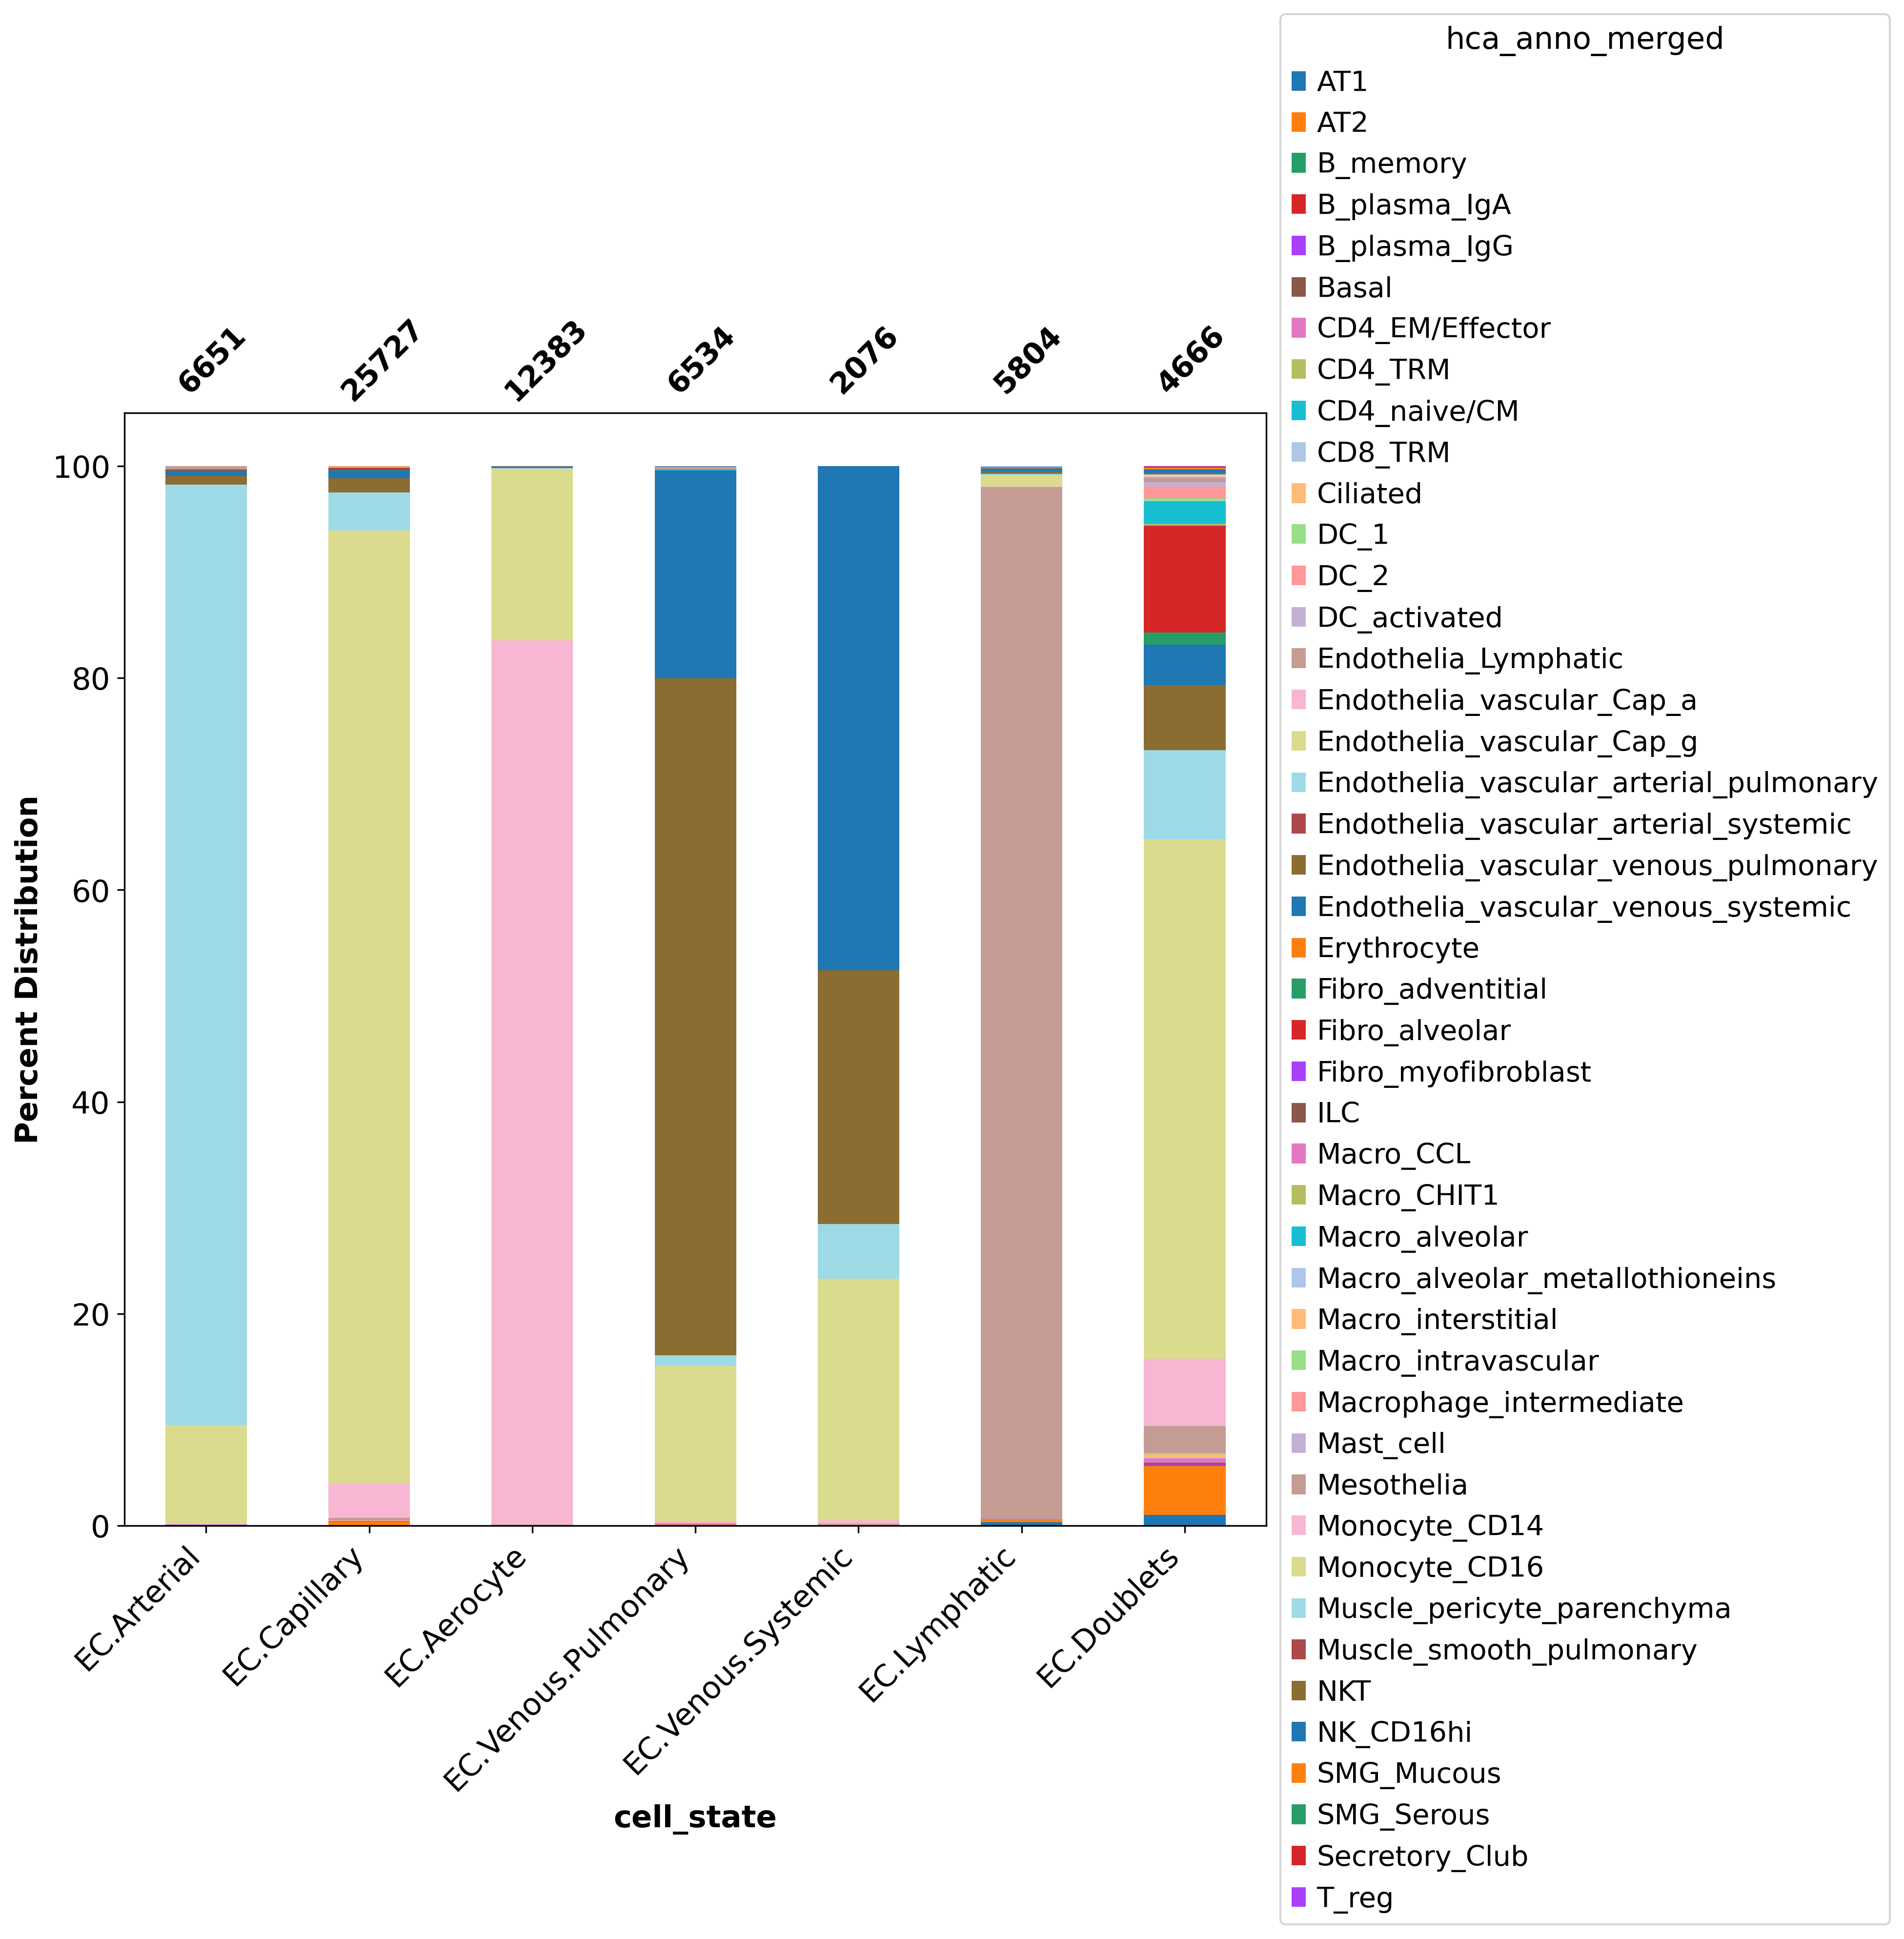

In [11]:
stacked_barplot(adata_subset,xaxis="cell_state",stack="hca_anno_merged",xaxis_label="cell_state",legend_label="hca_anno_merged",percent=False)

In [12]:
adata_healthy = adata[adata.obs["health_status"].isin(["Healthy"])]

In [13]:
adata_covid = adata[adata.obs["health_status"].isin(["COVID.19"])]

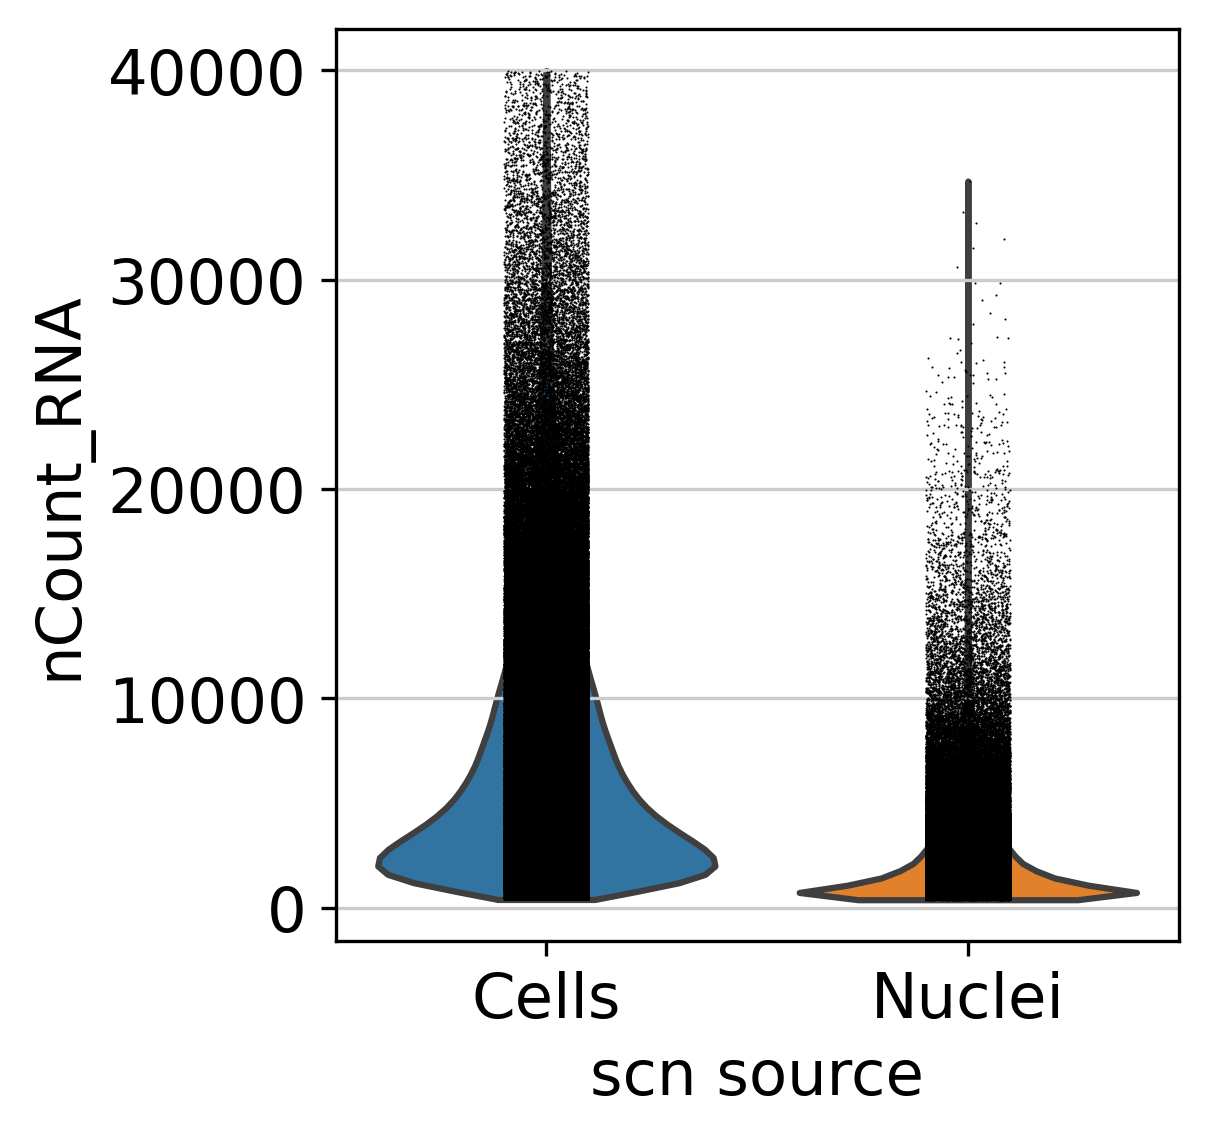

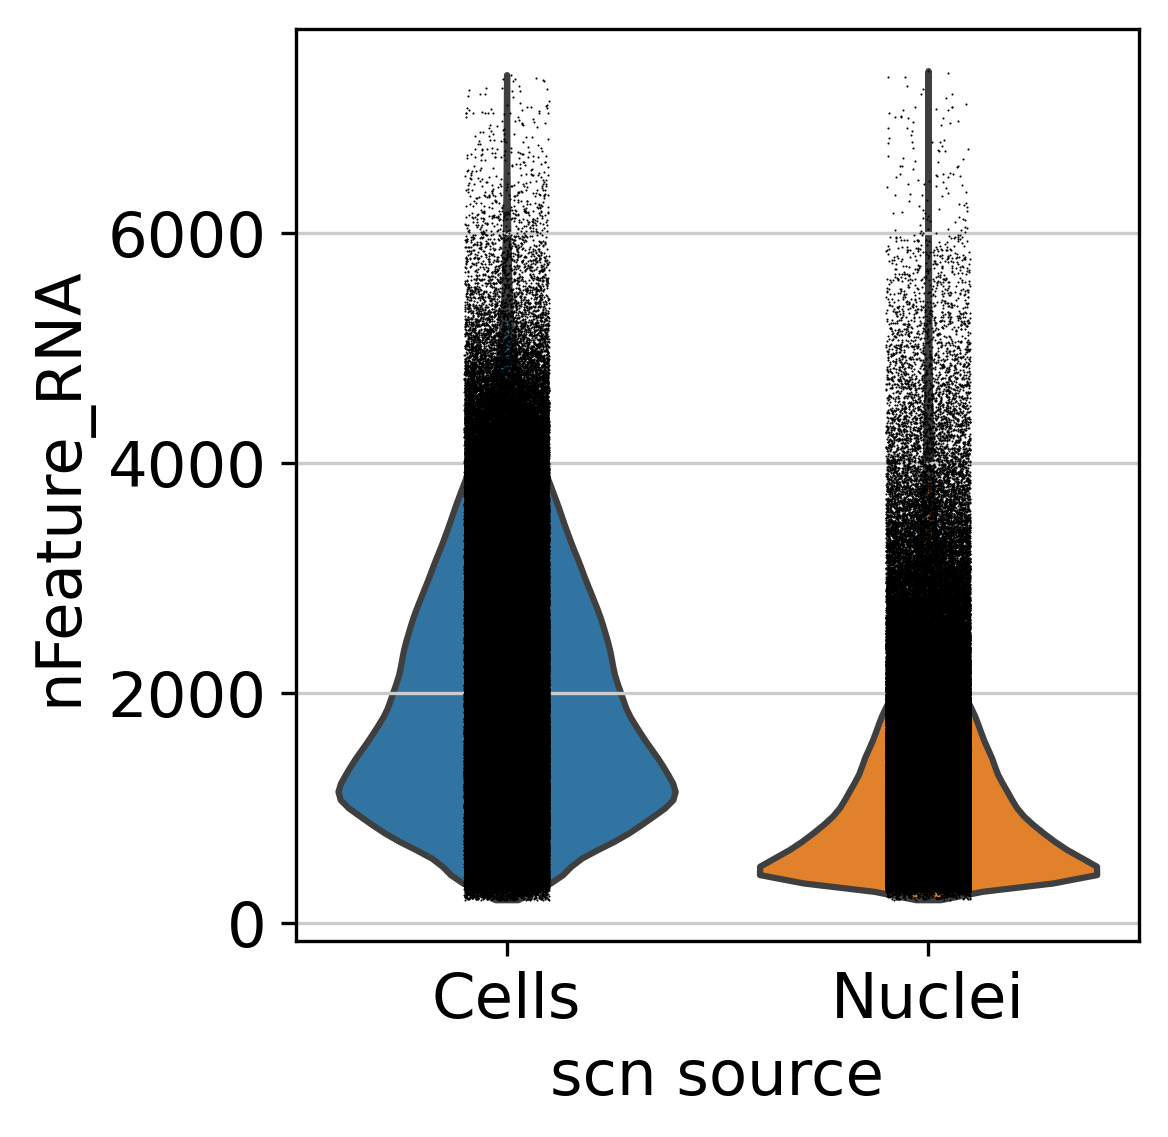

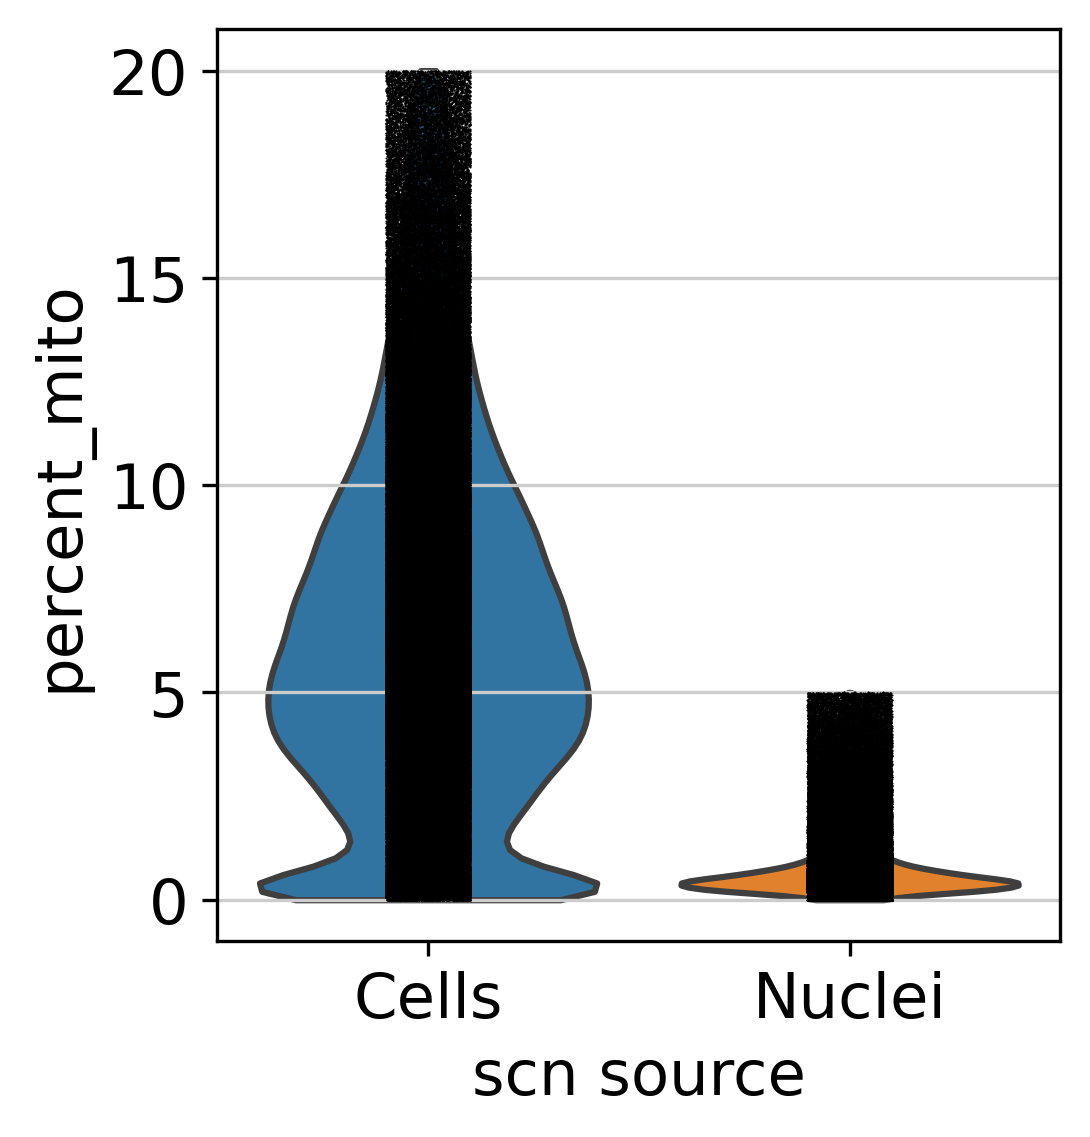

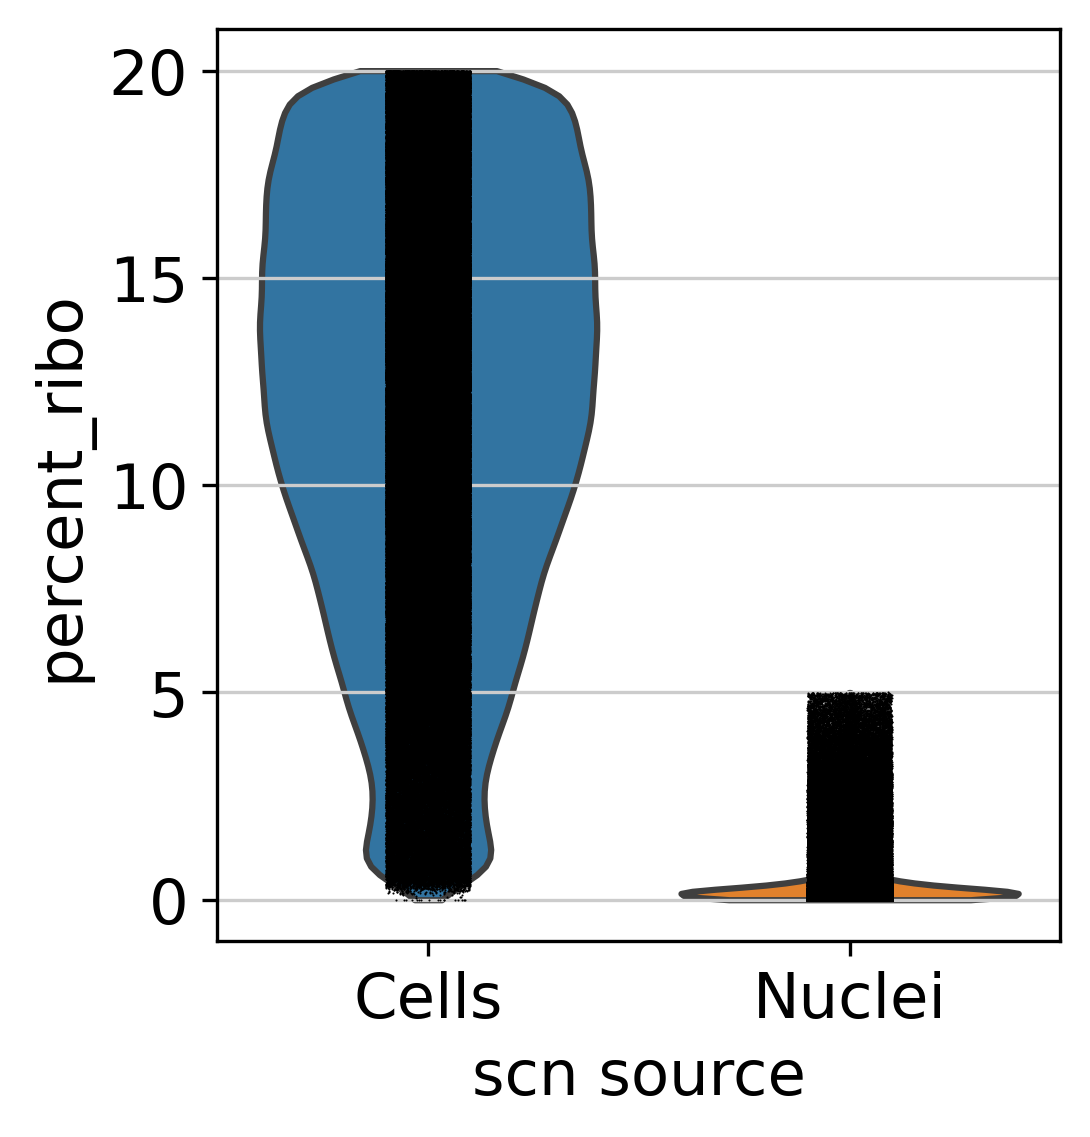

In [18]:
sc.pl.violin(adata, keys =  ["nCount_RNA"], groupby = 'scn_source', size = 0.5)
sc.pl.violin(adata, keys =  ["nFeature_RNA"], groupby = 'scn_source', size = 0.5)
sc.pl.violin(adata, keys =  ["percent_mito"], groupby = 'scn_source', size = 0.5)
sc.pl.violin(adata, keys =  ["percent_ribo"], groupby = 'scn_source', size = 0.5)

/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1227: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1227: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


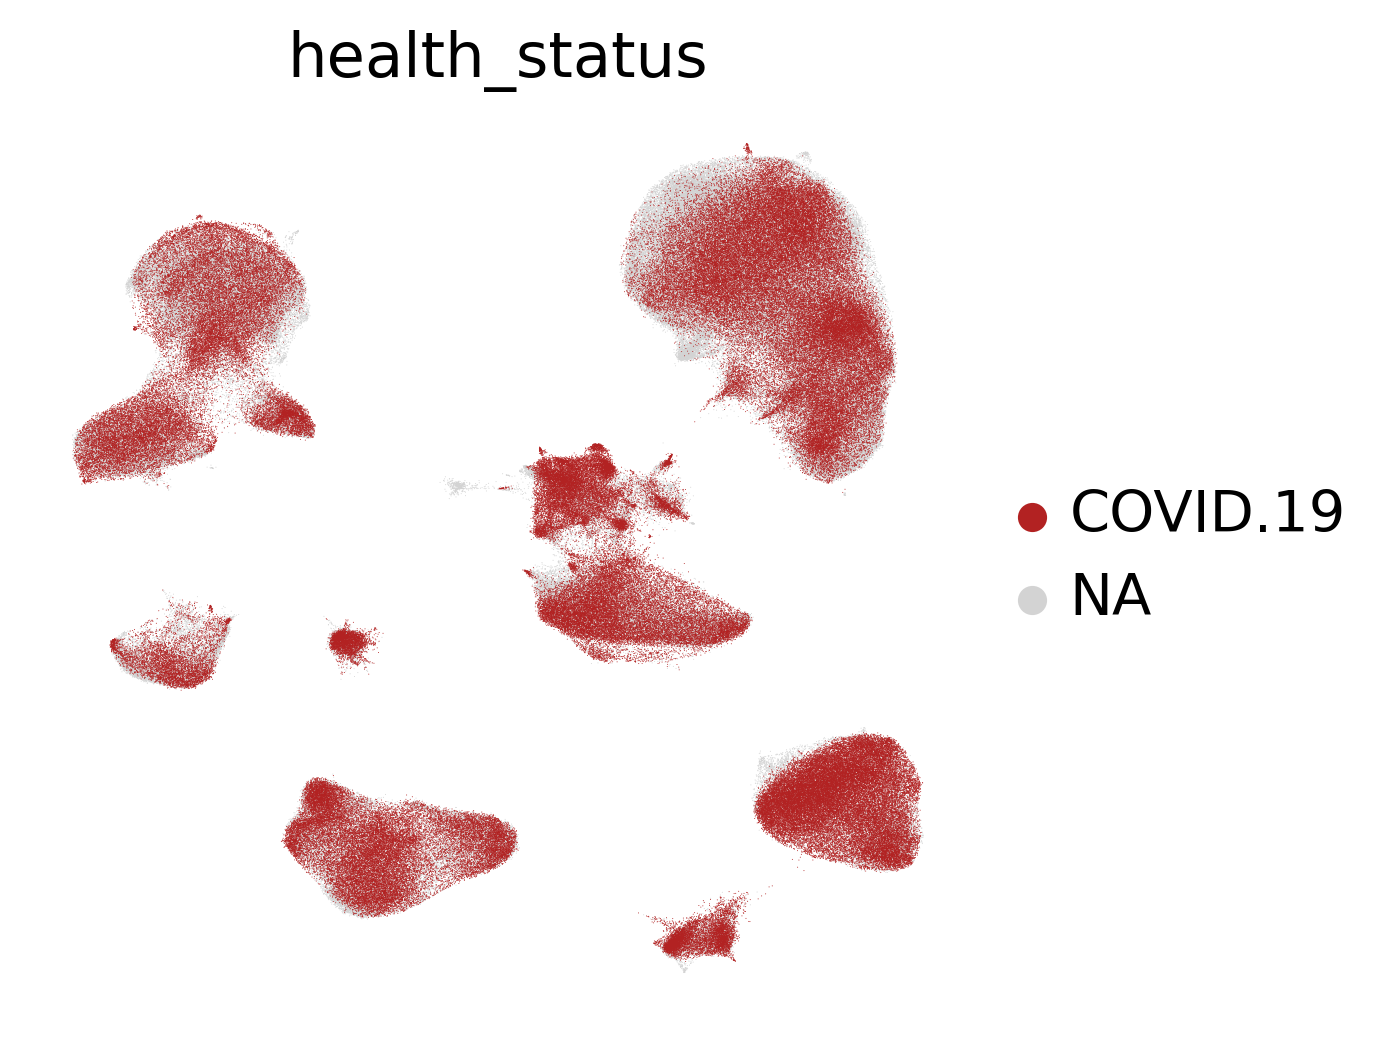

/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1227: FutureWarning: In a future version of pandas all arguments of Categorical.replace except for the argument 'value' will be keyword-only.
  values = values.replace(values.categories.difference(groups), np.nan)
/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1227: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


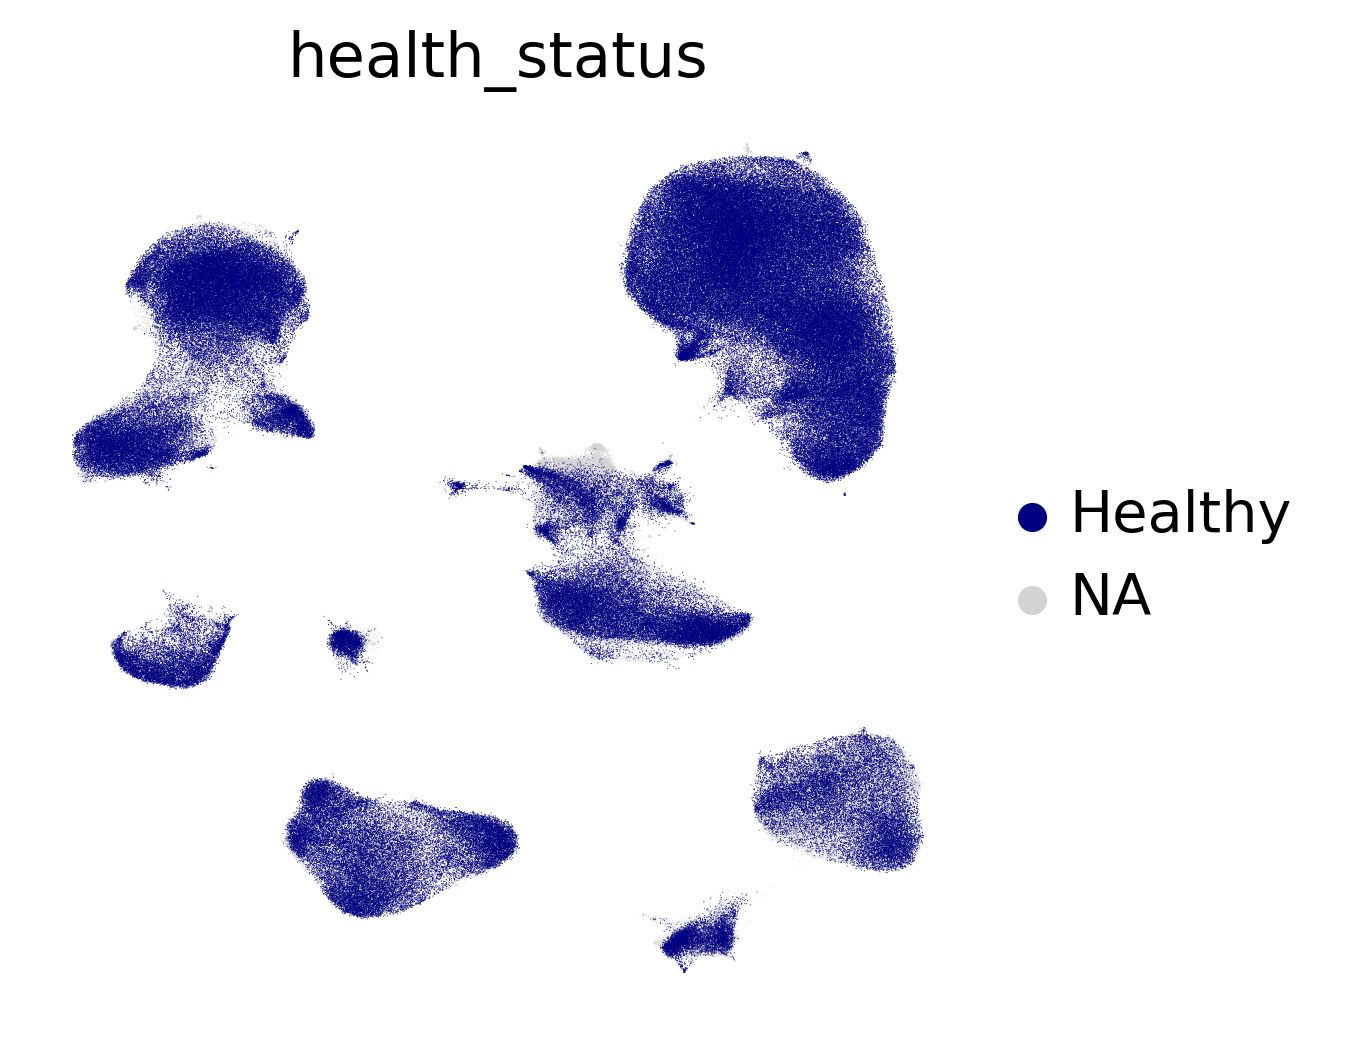

In [19]:
sc.pl.umap(adata, color = 'health_status', groups = ["COVID.19"], palette = ['firebrick'], frameon = False)
sc.pl.umap(adata, color = 'health_status', groups = ["Healthy"], palette = ['navy'], frameon = False)

In [20]:
adata

AnnData object with n_obs × n_vars = 536120 × 34091
    obs: 'nCount_RNA', 'nFeature_RNA', 'cell.id', 'study.batch', 'donor', 'samples', 'sex', 'age', 'ethnicity', 'smoking_status', 'health_status', 'region', 'version_10X', 'scn_source', 'cell_type_bharat20', 'cell_states_bharat20', 'cell_type_delorey21', 'cell_states_delorey21', 'cell_type_melms21', 'cell_states_melms21', 'cell_type_SatijaAtlas', 'original_annotation', 'scn_source_study.batch', 'donor_study.batch', 'samples_study.batch', 'percent_mito', 'percent_ribo', 'scrublet.scores_samples', 'scrublet.predicted_db_samples', 'scDblFinder.score_samples', 'scDblFinder.predicted_db_samples', 'nCount_SCT', 'nFeature_SCT', 'cell_type_mid', 'cell_id', 'hca_anno_merged', 'cell_type', 'cell_state'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'cell_state_colors', 'cell_states_colors', 'cell_type_colors', 'donor_colors', 'health_status_colors', 'scn_source_colors'
    obsm

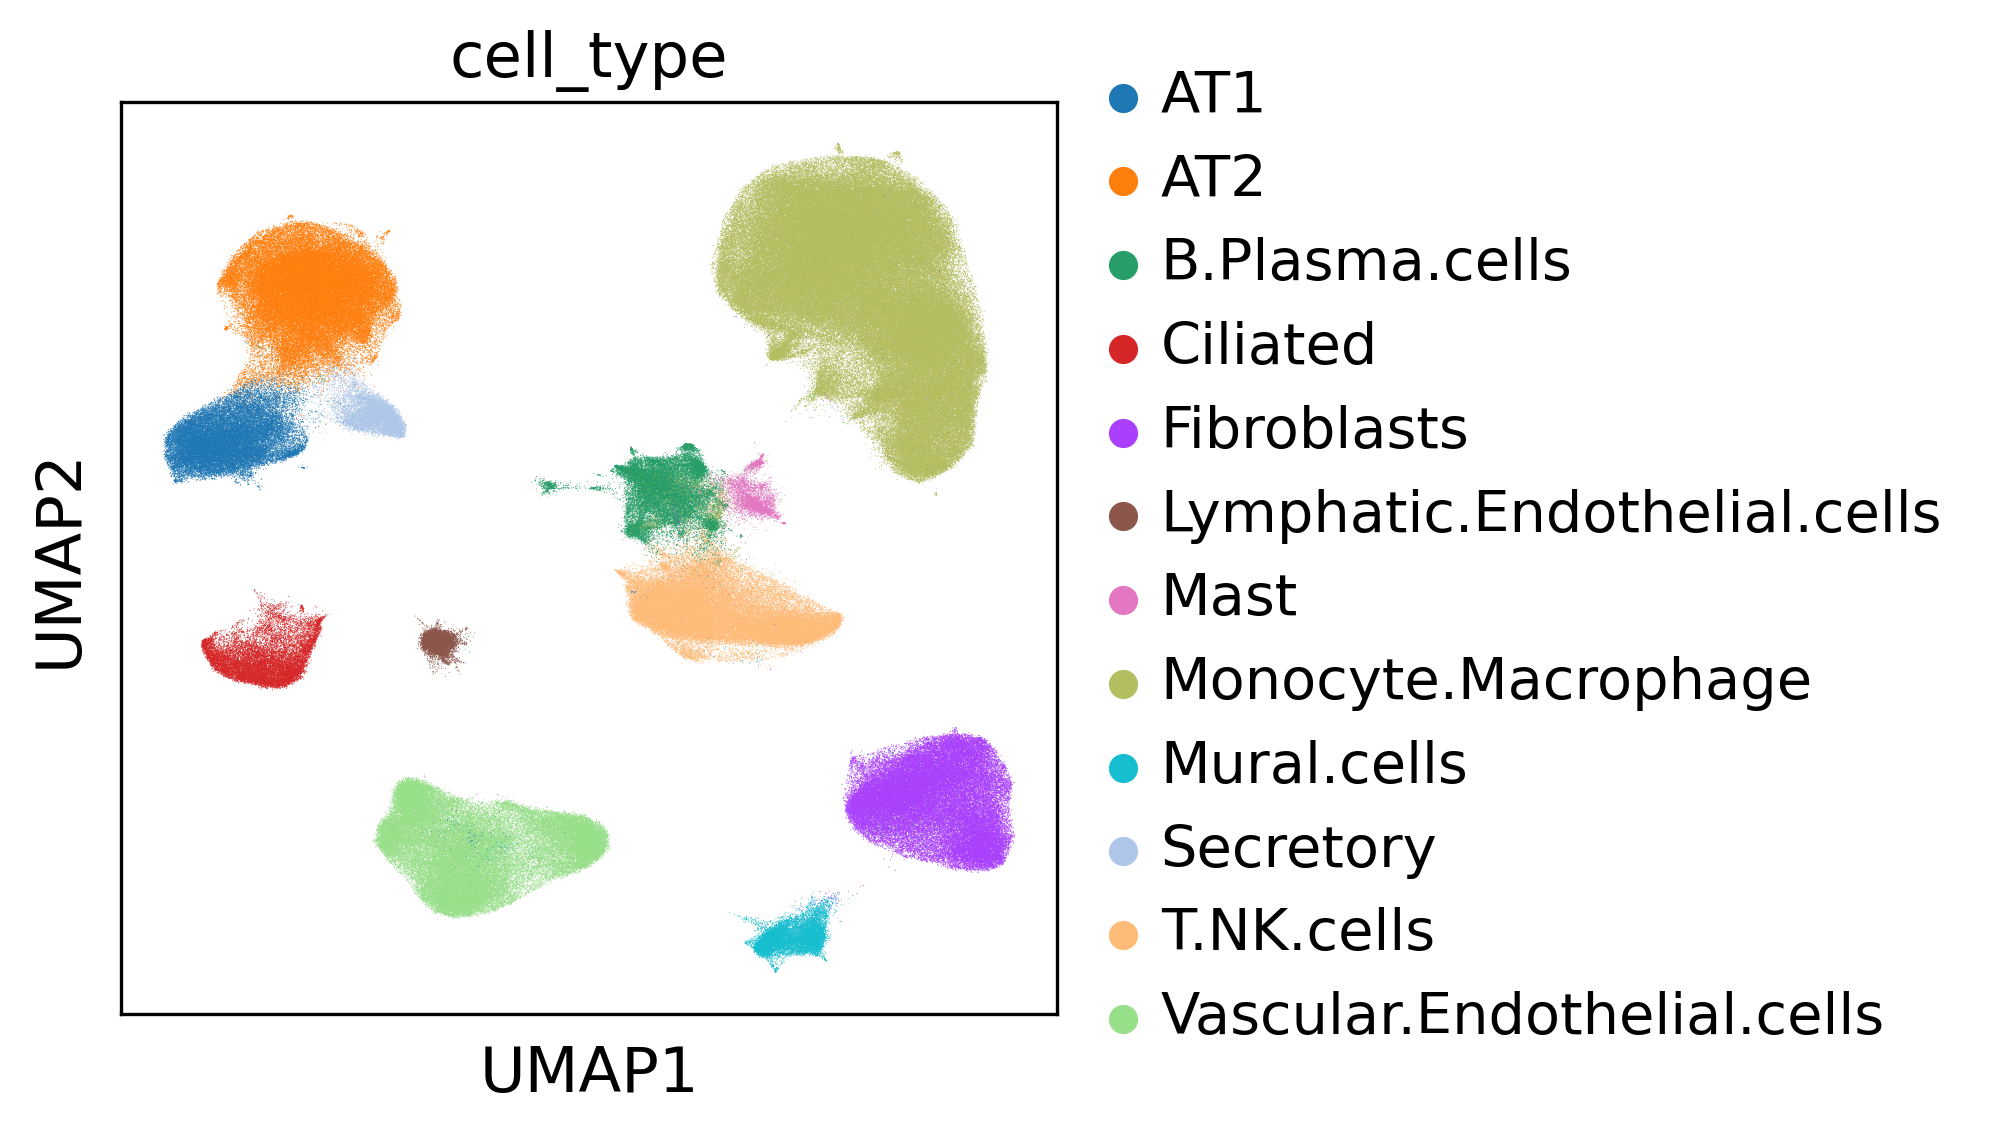

In [21]:
sc.pl.umap(adata, color = 'cell_type')

In [ ]:
sc.pl.umap(adata, color = "cell_state")

In [22]:
#rename states to shorthand and merge CHIT1/HSP with alveolar macrophages

cluster2annotation = {
    'EC.Venous.Pulmonary': 'EC.Venous.Pul',
    'EC.Venous.Systemic': 'EC.Venous.Sys',
    'Vascular.Smooth.Muscle': 'Vascular.SMC',
    'MYE.Macrophage.Alveolar': 'Macro.Alv',
    'MYE.Macrophage.Alveolar.Metallothionein.CCL': 'Macro.Alv.Meta.CCL',
    'MYE.Macrophage.CHIT1.like': 'Macro.Alv',
    'MYE.Macrophage.HSP': 'Macro.Alv',
    'MYE.Macrophage.Intravascular': 'Macro.IV',
    'EP.AT1' : 'EP.AT1',
    'EP.AT2': 'EP.AT2',
    'EP.Ciliated': 'EP.Ciliated',
    'EP.Doublets': 'EP.Doublets',
    'EP.Secretory': 'EP.Secretory',
    'EC.Aerocyte': 'EC.Aerocyte',
    'EC.Arterial': 'EC.Arterial',
    'EC.Capillary': 'EC.Capillary',
    'EC.Doublets': 'EC.Doublets',
    'EC.Lymphatic': 'EC.Lymphatic',
    'FB.Adventitial': 'FB.Adventitial',
    'FB.Alveolar': 'FB.Alveolar',
    'FB.Basal': 'FB.Basal',
    'FB.Doublets': 'FB.Doublets',
    'FB.Myofibroblast': 'FB.Myofibroblast',
    'Mesothelial': 'Mesothelial',
    'Pericytes': 'Pericytes',
    'B.Cell': 'B.Cell',
    'B.Doublets': 'B.Doublets',
    'B.Plasma.IgA': 'B.Plasma.IgA',
    'B.Plasma.IgG': 'B.Plasma.IgG',
    'Erythrocytes': 'Erythrocytes',
    'MYE.Monocyte': 'Monocyte',
    'Mast': 'Mast',
    'NK': 'NK',
    'Proliferating.MYE': 'Proliferating.MYE',
    'Proliferating.T.NK':'Proliferating.T.NK',
    'T.CD4': 'T.CD4',
    'T.CD8': 'T.CD8',
    
    
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs['cell_states'] = adata.obs['cell_state'].map(cluster2annotation).astype('category')

In [23]:
adata.obs.cell_states.value_counts()

Macro.Alv             121056
EP.AT2                 56450
Macro.IV               50630
Monocyte               36553
EP.AT1                 30169
EC.Capillary           25727
FB.Alveolar            16336
FB.Adventitial         15710
T.CD8                  15136
EP.Ciliated            14736
T.CD4                  14706
NK                     14513
FB.Basal               12740
EC.Aerocyte            12383
FB.Myofibroblast       12042
EP.Secretory            9933
B.Plasma.IgG            9261
B.Doublets              7703
EC.Arterial             6651
EC.Venous.Pul           6534
EC.Lymphatic            5804
Pericytes               5731
Vascular.SMC            5330
EC.Doublets             4666
EP.Doublets             4485
Mast                    4387
Proliferating.T.NK      2628
B.Plasma.IgA            2535
Macro.Alv.Meta.CCL      2419
B.Cell                  2358
Proliferating.MYE       2252
EC.Venous.Sys           2076
FB.Doublets             1771
Erythrocytes             585
Mesothelial   

In [24]:
adata2 = adata[~adata.obs["cell_states"].isin(["B.Doublets","EP.Doublets","EC.Doublets","FB.Doublets"])]

In [25]:
adata2.obs.cell_states.value_counts()

Macro.Alv             121056
EP.AT2                 56450
Macro.IV               50630
Monocyte               36553
EP.AT1                 30169
EC.Capillary           25727
FB.Alveolar            16336
FB.Adventitial         15710
T.CD8                  15136
EP.Ciliated            14736
T.CD4                  14706
NK                     14513
FB.Basal               12740
EC.Aerocyte            12383
FB.Myofibroblast       12042
EP.Secretory            9933
B.Plasma.IgG            9261
EC.Arterial             6651
EC.Venous.Pul           6534
EC.Lymphatic            5804
Pericytes               5731
Vascular.SMC            5330
Mast                    4387
Proliferating.T.NK      2628
B.Plasma.IgA            2535
Macro.Alv.Meta.CCL      2419
B.Cell                  2358
Proliferating.MYE       2252
EC.Venous.Sys           2076
Erythrocytes             585
Mesothelial              124
Name: cell_states, dtype: int64

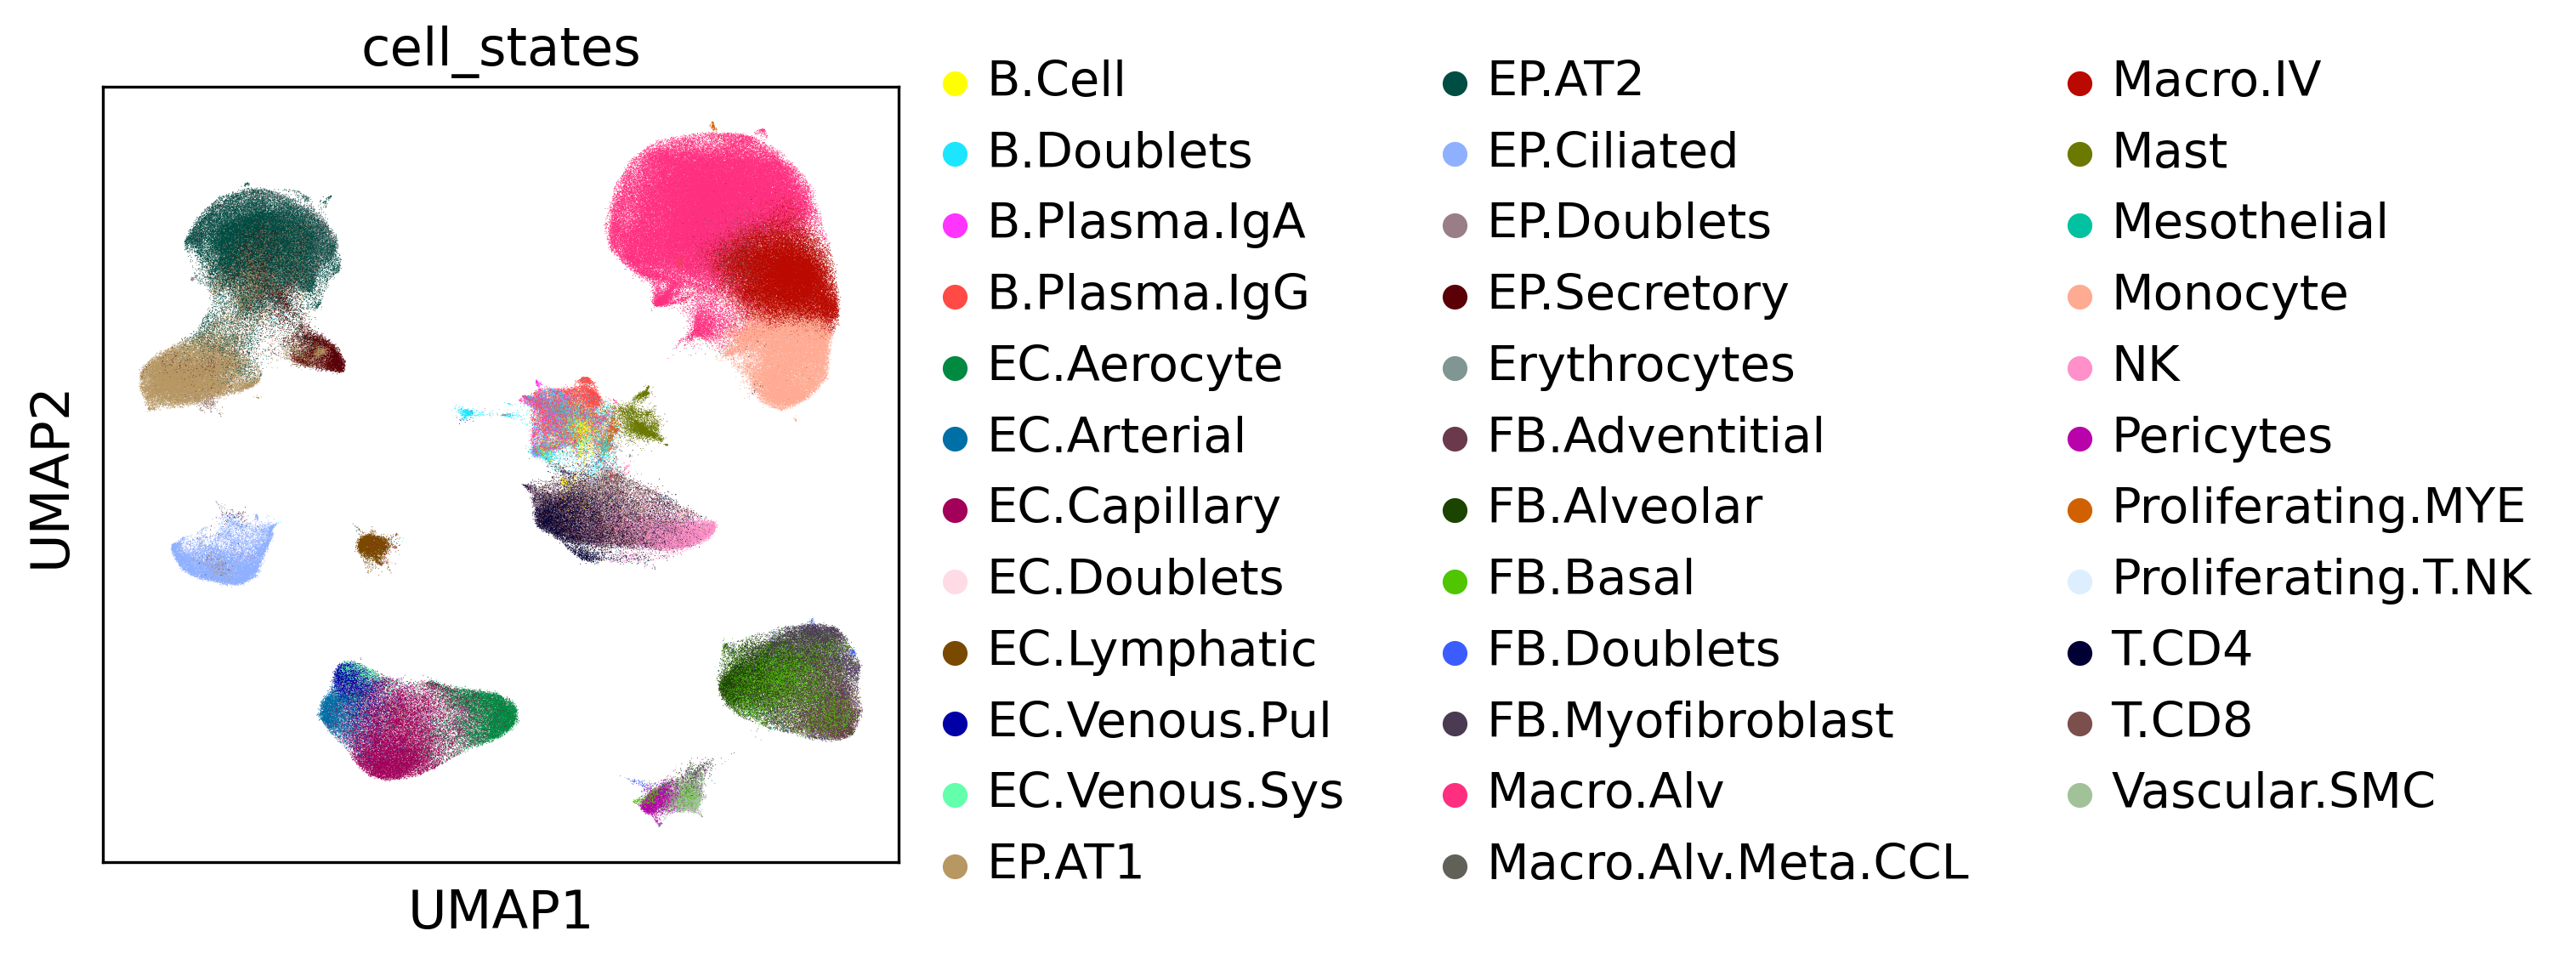

In [26]:
sc.pl.umap(adata, color = 'cell_states')

In [27]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
     'AT1': 'Epithelial',
     'AT2': 'Epithelial',
     'B.Plasma.cells': 'Immune',
     'Ciliated': 'Epithelial',
     'Fibroblasts': 'Stromal',
     'Lymphatic.Endothelial.cells': 'Endothelial',
     'Mast': 'Immune',
     'Monocyte.Macrophage': 'Immune',
     'Mural.cells': 'Stromal',
     'Secretory': 'Epithelial',
     'T.NK.cells': 'Immune',
     'Vascular.Endothelial.cells': 'Endothelial'

}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
adata.obs['cell_type_broad'] = adata.obs['cell_type'].map(cluster2annotation).astype('category')

In [28]:
adata.obs['cell_type_broad'].cat.reorder_categories(['Epithelial','Endothelial','Stromal','Immune'],inplace=True)

/var/tmp/pbs.18819.pbs/ipykernel_1381001/3574461216.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata.obs['cell_type_broad'].cat.reorder_categories(['Epithelial','Endothelial','Stromal','Immune'],inplace=True)


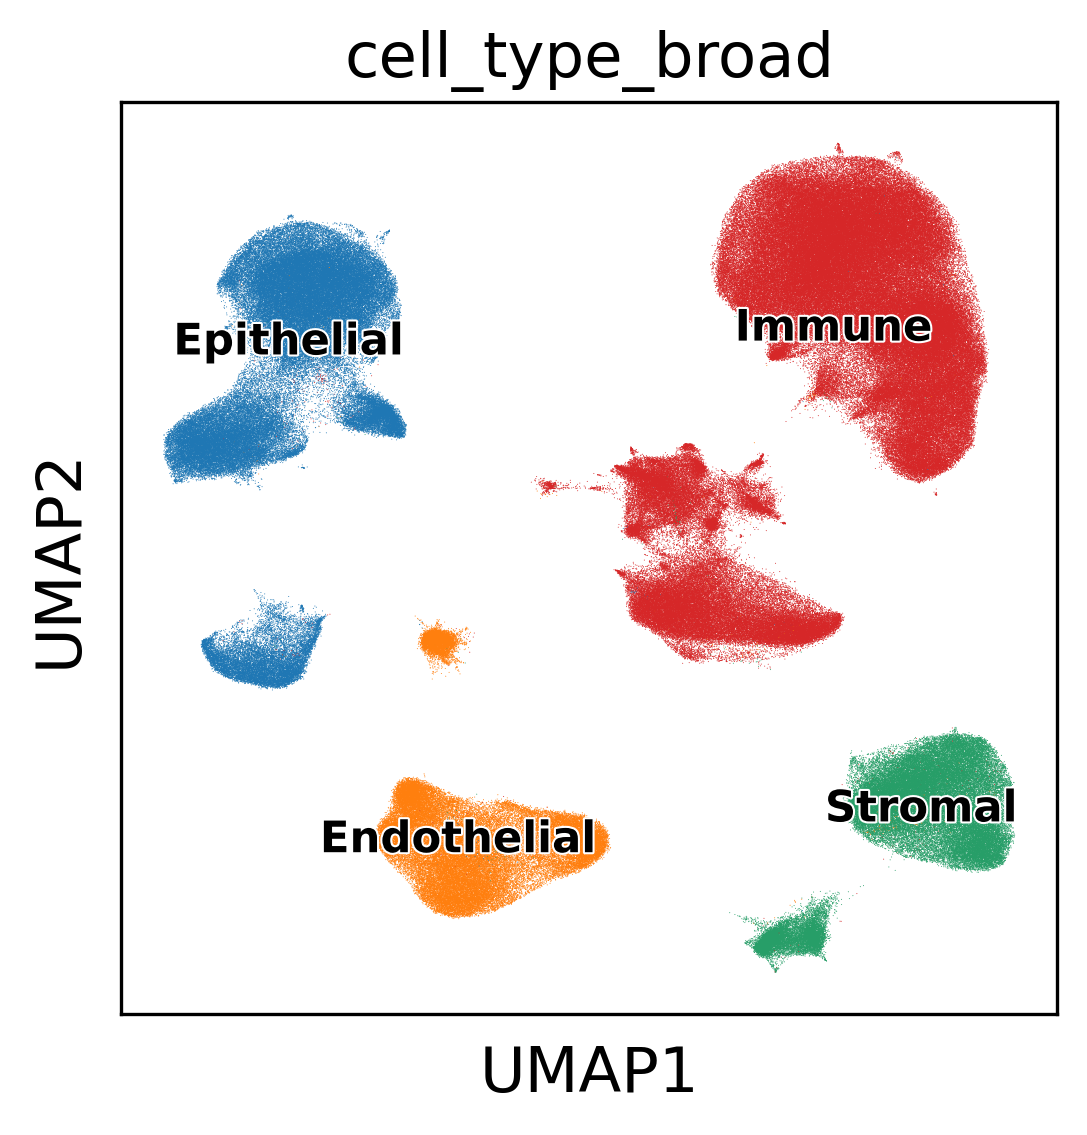

In [29]:
sc.pl.umap(adata, color = 'cell_type_broad', legend_loc = 'on data', legend_fontsize = 'x-small', legend_fontoutline = True)

marker_dict = {
        'B.Cell': ['CD19','MS4A1','BANK1'],
        'B.Plasma.IgA': ['IGHA1', 'IGHA2', 'CCR10'],
        'B.Plasma.IgG': ['IGHG1', 'IGHG3', 'IGHG2'],
        'EC.Aerocyte': ['HPGD', 'EDNRB', 'IL1RL1'],
        'EC.Arterial': ['GJA5', 'SEMA3G', 'DKK2'],
        'EC.Capillary': ['FCN3','CA4','GPIHBP1'],
        'EC.Lymphatic': ['CCL21', 'PROX1', 'FLT4'],
        'EC.Venous.Pulmonary': ["ACKR1", "SELP","CPE"],
        'EC.Venous.Systemic': ['SELE', "COL15A1", 'POSTN'],
        'EP.AT1': ["AGER","RTKN2","CLIC5"],
        'EP.AT2': ["SFTPC","SFTPA1","SFTPA2"],
        'EP.Ciliated': ["FOXJ1","CCDC78","DTHD1"], 
        'EP.Secretory': ["MUC5B","MUC5AC","SPDEF"],
        'Erythrocyte': ["HBA1", 'HBA2', 'HBB'],
        'FB.Basal': ['DCN','PDGFRA','LAMA2'],
        'FB.Adventitial': ['APOD', 'PI16', 'MFAP5'],
        'FB.Alveolar': ['FGFR4','GPC3','TCF21'],
        'FB.Myofibroblast': ["FAP", "TNC", "CTHRC1"],
        'Macro.Alv': ['MARCO','MCEMP1','INHBA'],
        'Macro.Alv.Meta.CCL': ['CCL20','MT1F','MT1H'],
        'Macro.Intravascular': ["F13A1",'LILRB5','FOLR2'],
        'Mast': ['CPA3','KIT','MS4A2'],
        'Mesothelial': ['CPA4','CALB2','ITLN1'],
        'Monocyte': ['EREG','CD14','FCGR3A'],
        'NK': ["GZMA",'GZMB','GNLY'],
        'Pericyte': ["RGS5","LAMC3","PTN"],
        'Proliferating': ["TOP2A", "MKI67", "ASPM"],
        'T.CD4': ['CD40LG','CCR6'],
        'T.CD8': ['CD8A','CD8B'],
        'Vascular.SMC': ["MYH11","ACTA2","TAGLN"],

}

sc.pl.matrixplot(adata, marker_dict, "cell_states", cmap = 'Purples', standard_scale = 'var', figsize = (14,5), save = "sup_cell_state_markers_2.pdf")

In [43]:
sc.settings.set_figure_params(dpi=300,fontsize=20)

marker_dict = {
        'B.Cell': ['CD19','MS4A1','BANK1'],
        'B.Plasma.IgA': ['IGHA1', 'IGHA2', 'CCR10'],
        'B.Plasma.IgG': ['IGHG1', 'IGHG3', 'IGHG2'],
        'EC.Aerocyte': ['HPGD', 'EDNRB', 'IL1RL1'],
        'EC.Arterial': ['GJA5', 'SEMA3G', 'DKK2'],
        'EC.Capillary': ['FCN3','CA4','GPIHBP1'],
        'EC.Lymphatic': ['CCL21', 'PROX1', 'FLT4'],
        'EC.Venous.Pulmonary': ["ACKR1", "SELP","CPE"],
        'EC.Venous.Systemic': ['SELE', "COL15A1", 'POSTN'],
        'EP.AT1': ["AGER","RTKN2","CLIC5"],
        'EP.AT2': ["SFTPC","SFTPA1","SFTPA2"],
        'EP.Ciliated': ["FOXJ1","CCDC78","DTHD1"], 
        'EP.Secretory': ["MUC5B","MUC5AC","SPDEF"],
        'Erythrocyte': ["HBA1", 'HBA2', 'HBB'],
        'FB.Basal': ['DCN','PDGFRA','LAMA2'],
        'FB.Adventitial': ['APOD', 'PI16', 'MFAP5'],
        'FB.Alveolar': ['FGFR4','GPC3','TCF21'],
        'FB.Myofibroblast': ["FAP", "TNC", "CTHRC1"],
        'Macro.Alv': ['MARCO','MCEMP1','INHBA'],
        'Macro.Alv.Meta.CCL': ['CCL20','MT1F','MT1H'],
        'Macro.Intravascular': ["F13A1",'LILRB5','FOLR2'],
        'Mast': ['CPA3','KIT','MS4A2'],
        'Mesothelial': ['CPA4','CALB2','ITLN1'],
        'Monocyte': ['EREG','CD14','FCGR3A'],
        'NK': ["GZMA",'GZMB','GNLY'],
        'Pericyte': ["RGS5","LAMC3","PTN"],
        'Proliferating': ["TOP2A", "MKI67", "ASPM"],
        'T.CD4': ['CD40LG','CCR6'],
        'T.CD8': ['CD8A','CD8B'],
        'Vascular.SMC': ["MYH11","ACTA2","TAGLN"],

}

sc.pl.matrixplot(adata, marker_dict, "cell_states", cmap = 'Purples', standard_scale = 'var', swap_axes = True)

#subset to states without doublets
adata_subset = adata[~adata.obs['cell_states'].isin(["B.Doublets","EC.Doublets","EP.Doublets","FB.Doublets"])].copy()

sc.pl.matrixplot(adata_subset, marker_dict, "cell_states", cmap = 'Purples', standard_scale = 'var', figsize = (14,5), save = "sup_cell_state_markers_no_doublets.pdf")

In [10]:
sc.tl.rank_genes_groups(adata_subset,groupby='cell_states',n_genes=100,method='t-test_overestim_var',corr_method='benjamini-hochberg') #change grouby accordingly. Change n_genes accordingly to the number of DE genes you want

/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site

In [21]:
class PySankeyException(Exception):
    pass


class NullsInFrame(PySankeyException):
    pass


class LabelMismatch(PySankeyException):
    pass


def check_data_matches_labels(labels, data, side):
    if len(labels) > 0:
        if isinstance(data, list):
            data = set(data)
        if isinstance(data, pd.Series):
            data = set(data.unique().tolist())
        if isinstance(labels, list):
            labels = set(labels)
        if labels != data:
            msg = "\n"
            if len(labels) <= 20:
                msg = "Labels: " + ",".join(labels) + "\n"
            if len(data) < 20:
                msg += "Data: " + ",".join(data)
            raise LabelMismatch('{0} labels and data do not match.{1}'.format(side, msg))
            
def sankey(left, right, leftWeight=None, rightWeight=None, colorDict=None,
           leftLabels=None, rightLabels=None, aspect=4, rightColor=False,
           fontsize=14, figureName=None, closePlot=False, font_family='DejaVu Sans'):
    '''
    Make Sankey Diagram showing flow from left-->right
    Inputs:
        left = NumPy array of object labels on the left of the diagram
        right = NumPy array of corresponding labels on the right of the diagram
            len(right) == len(left)
        leftWeight = NumPy array of weights for each strip starting from the
            left of the diagram, if not specified 1 is assigned
        rightWeight = NumPy array of weights for each strip starting from the
            right of the diagram, if not specified the corresponding leftWeight
            is assigned
        colorDict = Dictionary of colors to use for each label
            {'label':'color'}
        leftLabels = order of the left labels in the diagram
        rightLabels = order of the right labels in the diagram
        aspect = vertical extent of the diagram in units of horizontal extent
        rightColor = If true, each strip in the diagram will be be colored
                    according to its left label
    Ouput:
        None
    '''
    if leftWeight is None:
        leftWeight = []
    if rightWeight is None:
        rightWeight = []
    if leftLabels is None:
        leftLabels = []
    if rightLabels is None:
        rightLabels = []
    # Check weights
    if len(leftWeight) == 0:
        leftWeight = np.ones(len(left))

    if len(rightWeight) == 0:
        rightWeight = leftWeight

    plt.figure()
    plt.rc('text', usetex=False)
    plt.rc('font', family=font_family)

    # Create Dataframe
    if isinstance(left, pd.Series):
        left = left.reset_index(drop=True)
    if isinstance(right, pd.Series):
        right = right.reset_index(drop=True)
    dataFrame = pd.DataFrame({'left': left, 'right': right, 'leftWeight': leftWeight,
                              'rightWeight': rightWeight}, index=range(len(left)))

    if len(dataFrame[(dataFrame.left.isnull()) | (dataFrame.right.isnull())]):
        raise NullsInFrame('Sankey graph does not support null values.')

    # Identify all labels that appear 'left' or 'right'
    allLabels = pd.Series(np.r_[dataFrame.left.unique(), dataFrame.right.unique()]).unique()

    # Identify left labels
    if len(leftLabels) == 0:
        leftLabels = pd.Series(dataFrame.left.unique()).unique()
    else:
        check_data_matches_labels(leftLabels, dataFrame['left'], 'left')

    # Identify right labels
    if len(rightLabels) == 0:
        rightLabels = pd.Series(dataFrame.right.unique()).unique()
    else:
        check_data_matches_labels(leftLabels, dataFrame['right'], 'right')
    # If no colorDict given, make one
    if colorDict is None:
        colorDict = {}
        palette = "hls"
        colorPalette = sns.color_palette(palette, len(allLabels))
        for i, label in enumerate(allLabels):
            colorDict[label] = colorPalette[i]
    else:
        missing = [label for label in allLabels if label not in colorDict.keys()]
        if missing:
            msg = "The colorDict parameter is missing values for the following labels : "
            msg += '{}'.format(', '.join(missing))
            raise ValueError(msg)

    # Determine widths of individual strips
    ns_l = defaultdict()
    ns_r = defaultdict()
    for leftLabel in leftLabels:
        leftDict = {}
        rightDict = {}
        for rightLabel in rightLabels:
            leftDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].leftWeight.sum()
            rightDict[rightLabel] = dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)].rightWeight.sum()
        ns_l[leftLabel] = leftDict
        ns_r[leftLabel] = rightDict

    # Determine positions of left label patches and total widths
    leftWidths = defaultdict()
    for i, leftLabel in enumerate(leftLabels):
        myD = {}
        myD['left'] = dataFrame[dataFrame.left == leftLabel].leftWeight.sum()
        if i == 0:
            myD['bottom'] = 0
            myD['top'] = myD['left']
        else:
            myD['bottom'] = leftWidths[leftLabels[i - 1]]['top'] + 0.02 * dataFrame.leftWeight.sum()
            myD['top'] = myD['bottom'] + myD['left']
            topEdge = myD['top']
        leftWidths[leftLabel] = myD

    # Determine positions of right label patches and total widths
    rightWidths = defaultdict()
    for i, rightLabel in enumerate(rightLabels):
        myD = {}
        myD['right'] = dataFrame[dataFrame.right == rightLabel].rightWeight.sum()
        if i == 0:
            myD['bottom'] = 0
            myD['top'] = myD['right']
        else:
            myD['bottom'] = rightWidths[rightLabels[i - 1]]['top'] + 0.02 * dataFrame.rightWeight.sum()
            myD['top'] = myD['bottom'] + myD['right']
            topEdge = myD['top']
        rightWidths[rightLabel] = myD

    # Total vertical extent of diagram
    xMax = topEdge / aspect

    # Draw vertical bars on left and right of each  label's section & print label
    for leftLabel in leftLabels:
        plt.fill_between(
            [-0.02 * xMax, 0],
            2 * [leftWidths[leftLabel]['bottom']],
            2 * [leftWidths[leftLabel]['bottom'] + leftWidths[leftLabel]['left']],
            color=colorDict[leftLabel],
            alpha=0.99
        )
        plt.text(
            -0.05 * xMax,
            leftWidths[leftLabel]['bottom'] + 0.5 * leftWidths[leftLabel]['left'],
            leftLabel,
            {'ha': 'right', 'va': 'center'},
            fontsize=fontsize
        )
    for rightLabel in rightLabels:
        plt.fill_between(
            [xMax, 1.02 * xMax], 2 * [rightWidths[rightLabel]['bottom']],
            2 * [rightWidths[rightLabel]['bottom'] + rightWidths[rightLabel]['right']],
            color=colorDict[rightLabel],
            alpha=0.99
        )
        plt.text(
            1.05 * xMax,
            rightWidths[rightLabel]['bottom'] + 0.5 * rightWidths[rightLabel]['right'],
            rightLabel,
            {'ha': 'left', 'va': 'center'},
            fontsize=fontsize
        )

    # Plot strips
    for leftLabel in leftLabels:
        for rightLabel in rightLabels:
            labelColor = leftLabel
            if rightColor:
                labelColor = rightLabel
            if len(dataFrame[(dataFrame.left == leftLabel) & (dataFrame.right == rightLabel)]) > 0:
                # Create array of y values for each strip, half at left value,
                # half at right, convolve
                ys_d = np.array(50 * [leftWidths[leftLabel]['bottom']] + 50 * [rightWidths[rightLabel]['bottom']])
                ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
                ys_d = np.convolve(ys_d, 0.05 * np.ones(20), mode='valid')
                ys_u = np.array(50 * [leftWidths[leftLabel]['bottom'] + ns_l[leftLabel][rightLabel]] + 50 * [rightWidths[rightLabel]['bottom'] + ns_r[leftLabel][rightLabel]])
                ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')
                ys_u = np.convolve(ys_u, 0.05 * np.ones(20), mode='valid')

                # Update bottom edges at each label so next strip starts at the right place
                leftWidths[leftLabel]['bottom'] += ns_l[leftLabel][rightLabel]
                rightWidths[rightLabel]['bottom'] += ns_r[leftLabel][rightLabel]
                plt.fill_between(
                    np.linspace(0, xMax, len(ys_d)), ys_d, ys_u, alpha=0.65,
                    color=colorDict[labelColor]
                )
    plt.gca().axis('off')
    plt.gcf().set_size_inches(6, 6)
    if figureName != None:
        plt.savefig("{}.png".format(figureName), bbox_inches='tight', dpi=150)
    if closePlot:
        plt.close()

In [22]:
adata.obs["cell_type_broad"].cat.categories

Index(['Endothelial', 'Epithelial', 'Immune', 'Stromal'], dtype='object')

In [23]:
adata.obs["cell_states"].cat.categories

Index(['B.Cell', 'B.Doublets', 'B.Plasma.IgA', 'B.Plasma.IgG', 'EC.Aerocyte',
       'EC.Arterial', 'EC.Capillary', 'EC.Doublets', 'EC.Lymphatic',
       'EC.Venous.Pul', 'EC.Venous.Sys', 'EP.AT1', 'EP.AT2', 'EP.Ciliated',
       'EP.Doublets', 'EP.Secretory', 'Erythrocytes', 'FB.Adventitial',
       'FB.Alveolar', 'FB.Basal', 'FB.Doublets', 'FB.Myofibroblast',
       'Macro.Alv', 'Macro.Alv.Meta.CCL', 'Macro.IV', 'Mast', 'Mesothelial',
       'Monocyte', 'NK', 'Pericytes', 'Proliferating.MYE',
       'Proliferating.T.NK', 'T.CD4', 'T.CD8', 'Vascular.SMC'],
      dtype='object')

In [24]:
all_states=list(adata.obs["cell_type_broad"].cat.categories)+list(adata.obs["cell_states"].cat.categories)

In [25]:
all_states

['Endothelial',
 'Epithelial',
 'Immune',
 'Stromal',
 'B.Cell',
 'B.Doublets',
 'B.Plasma.IgA',
 'B.Plasma.IgG',
 'EC.Aerocyte',
 'EC.Arterial',
 'EC.Capillary',
 'EC.Doublets',
 'EC.Lymphatic',
 'EC.Venous.Pul',
 'EC.Venous.Sys',
 'EP.AT1',
 'EP.AT2',
 'EP.Ciliated',
 'EP.Doublets',
 'EP.Secretory',
 'Erythrocytes',
 'FB.Adventitial',
 'FB.Alveolar',
 'FB.Basal',
 'FB.Doublets',
 'FB.Myofibroblast',
 'Macro.Alv',
 'Macro.Alv.Meta.CCL',
 'Macro.IV',
 'Mast',
 'Mesothelial',
 'Monocyte',
 'NK',
 'Pericytes',
 'Proliferating.MYE',
 'Proliferating.T.NK',
 'T.CD4',
 'T.CD8',
 'Vascular.SMC']

In [26]:
adata

AnnData object with n_obs × n_vars = 536120 × 34091
    obs: 'nCount_RNA', 'nFeature_RNA', 'cell.id', 'study.batch', 'donor', 'samples', 'sex', 'age', 'ethnicity', 'smoking_status', 'health_status', 'region', 'version_10X', 'scn_source', 'cell_type_bharat20', 'cell_states_bharat20', 'cell_type_delorey21', 'cell_states_delorey21', 'cell_type_melms21', 'cell_states_melms21', 'cell_type_SatijaAtlas', 'original_annotation', 'scn_source_study.batch', 'donor_study.batch', 'samples_study.batch', 'percent_mito', 'percent_ribo', 'scrublet.scores_samples', 'scrublet.predicted_db_samples', 'scDblFinder.score_samples', 'scDblFinder.predicted_db_samples', 'nCount_SCT', 'nFeature_SCT', 'cell_type_mid', 'cell_id', 'hca_anno_merged', 'cell_type', 'cell_state', 'cell_type_broad', 'cell_states'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'cell_state_colors', 'cell_states_colors', 'cell_type_colors', 'donor_colors', 'health_status_col

In [27]:
colors=list(adata.uns["cell_type_broad_colors"])+list(adata.uns["cell_states_colors"])

In [28]:
colors

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#ffff00',
 '#1ce6ff',
 '#ff34ff',
 '#ff4a46',
 '#008941',
 '#006fa6',
 '#a30059',
 '#ffdbe5',
 '#7a4900',
 '#0000a6',
 '#63ffac',
 '#b79762',
 '#004d43',
 '#8fb0ff',
 '#997d87',
 '#5a0007',
 '#809693',
 '#6a3a4c',
 '#1b4400',
 '#4fc601',
 '#3b5dff',
 '#4a3b53',
 '#ff2f80',
 '#61615a',
 '#ba0900',
 '#6b7900',
 '#00c2a0',
 '#ffaa92',
 '#ff90c9',
 '#b903aa',
 '#d16100',
 '#ddefff',
 '#000035',
 '#7b4f4b',
 '#a1c299',
 '#300018',
 '#0aa6d8']

In [29]:
colordict = dict(zip(all_states, colors))

In [30]:
colordict

{'Endothelial': '#1f77b4',
 'Epithelial': '#ff7f0e',
 'Immune': '#279e68',
 'Stromal': '#d62728',
 'B.Cell': '#ffff00',
 'B.Doublets': '#1ce6ff',
 'B.Plasma.IgA': '#ff34ff',
 'B.Plasma.IgG': '#ff4a46',
 'EC.Aerocyte': '#008941',
 'EC.Arterial': '#006fa6',
 'EC.Capillary': '#a30059',
 'EC.Doublets': '#ffdbe5',
 'EC.Lymphatic': '#7a4900',
 'EC.Venous.Pul': '#0000a6',
 'EC.Venous.Sys': '#63ffac',
 'EP.AT1': '#b79762',
 'EP.AT2': '#004d43',
 'EP.Ciliated': '#8fb0ff',
 'EP.Doublets': '#997d87',
 'EP.Secretory': '#5a0007',
 'Erythrocytes': '#809693',
 'FB.Adventitial': '#6a3a4c',
 'FB.Alveolar': '#1b4400',
 'FB.Basal': '#4fc601',
 'FB.Doublets': '#3b5dff',
 'FB.Myofibroblast': '#4a3b53',
 'Macro.Alv': '#ff2f80',
 'Macro.Alv.Meta.CCL': '#61615a',
 'Macro.IV': '#ba0900',
 'Mast': '#6b7900',
 'Mesothelial': '#00c2a0',
 'Monocyte': '#ffaa92',
 'NK': '#ff90c9',
 'Pericytes': '#b903aa',
 'Proliferating.MYE': '#d16100',
 'Proliferating.T.NK': '#ddefff',
 'T.CD4': '#000035',
 'T.CD8': '#7b4f4b',
 'V

In [31]:
adata

AnnData object with n_obs × n_vars = 536120 × 34091
    obs: 'nCount_RNA', 'nFeature_RNA', 'cell.id', 'study.batch', 'donor', 'samples', 'sex', 'age', 'ethnicity', 'smoking_status', 'health_status', 'region', 'version_10X', 'scn_source', 'cell_type_bharat20', 'cell_states_bharat20', 'cell_type_delorey21', 'cell_states_delorey21', 'cell_type_melms21', 'cell_states_melms21', 'cell_type_SatijaAtlas', 'original_annotation', 'scn_source_study.batch', 'donor_study.batch', 'samples_study.batch', 'percent_mito', 'percent_ribo', 'scrublet.scores_samples', 'scrublet.predicted_db_samples', 'scDblFinder.score_samples', 'scDblFinder.predicted_db_samples', 'nCount_SCT', 'nFeature_SCT', 'cell_type_mid', 'cell_id', 'hca_anno_merged', 'cell_type', 'cell_state', 'cell_type_broad', 'cell_states'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'cell_state_colors', 'cell_states_colors', 'cell_type_colors', 'donor_colors', 'health_status_col

plt.rcParams['figure.dpi'] = 300 # change dpi to change figure size
# we use the colordict created above in the colorDict option on pySankey
sankey(adata.obs["cell_type_broad"], adata.obs["cell_states"], aspect=10, fontsize=6, colorDict=colordict)

In [33]:
right = set(adata.obs["cell_states"])

In [34]:
len(right)

35

In [35]:
df = adata.obs.sort_values(by=["cell_type_broad","cell_states"])

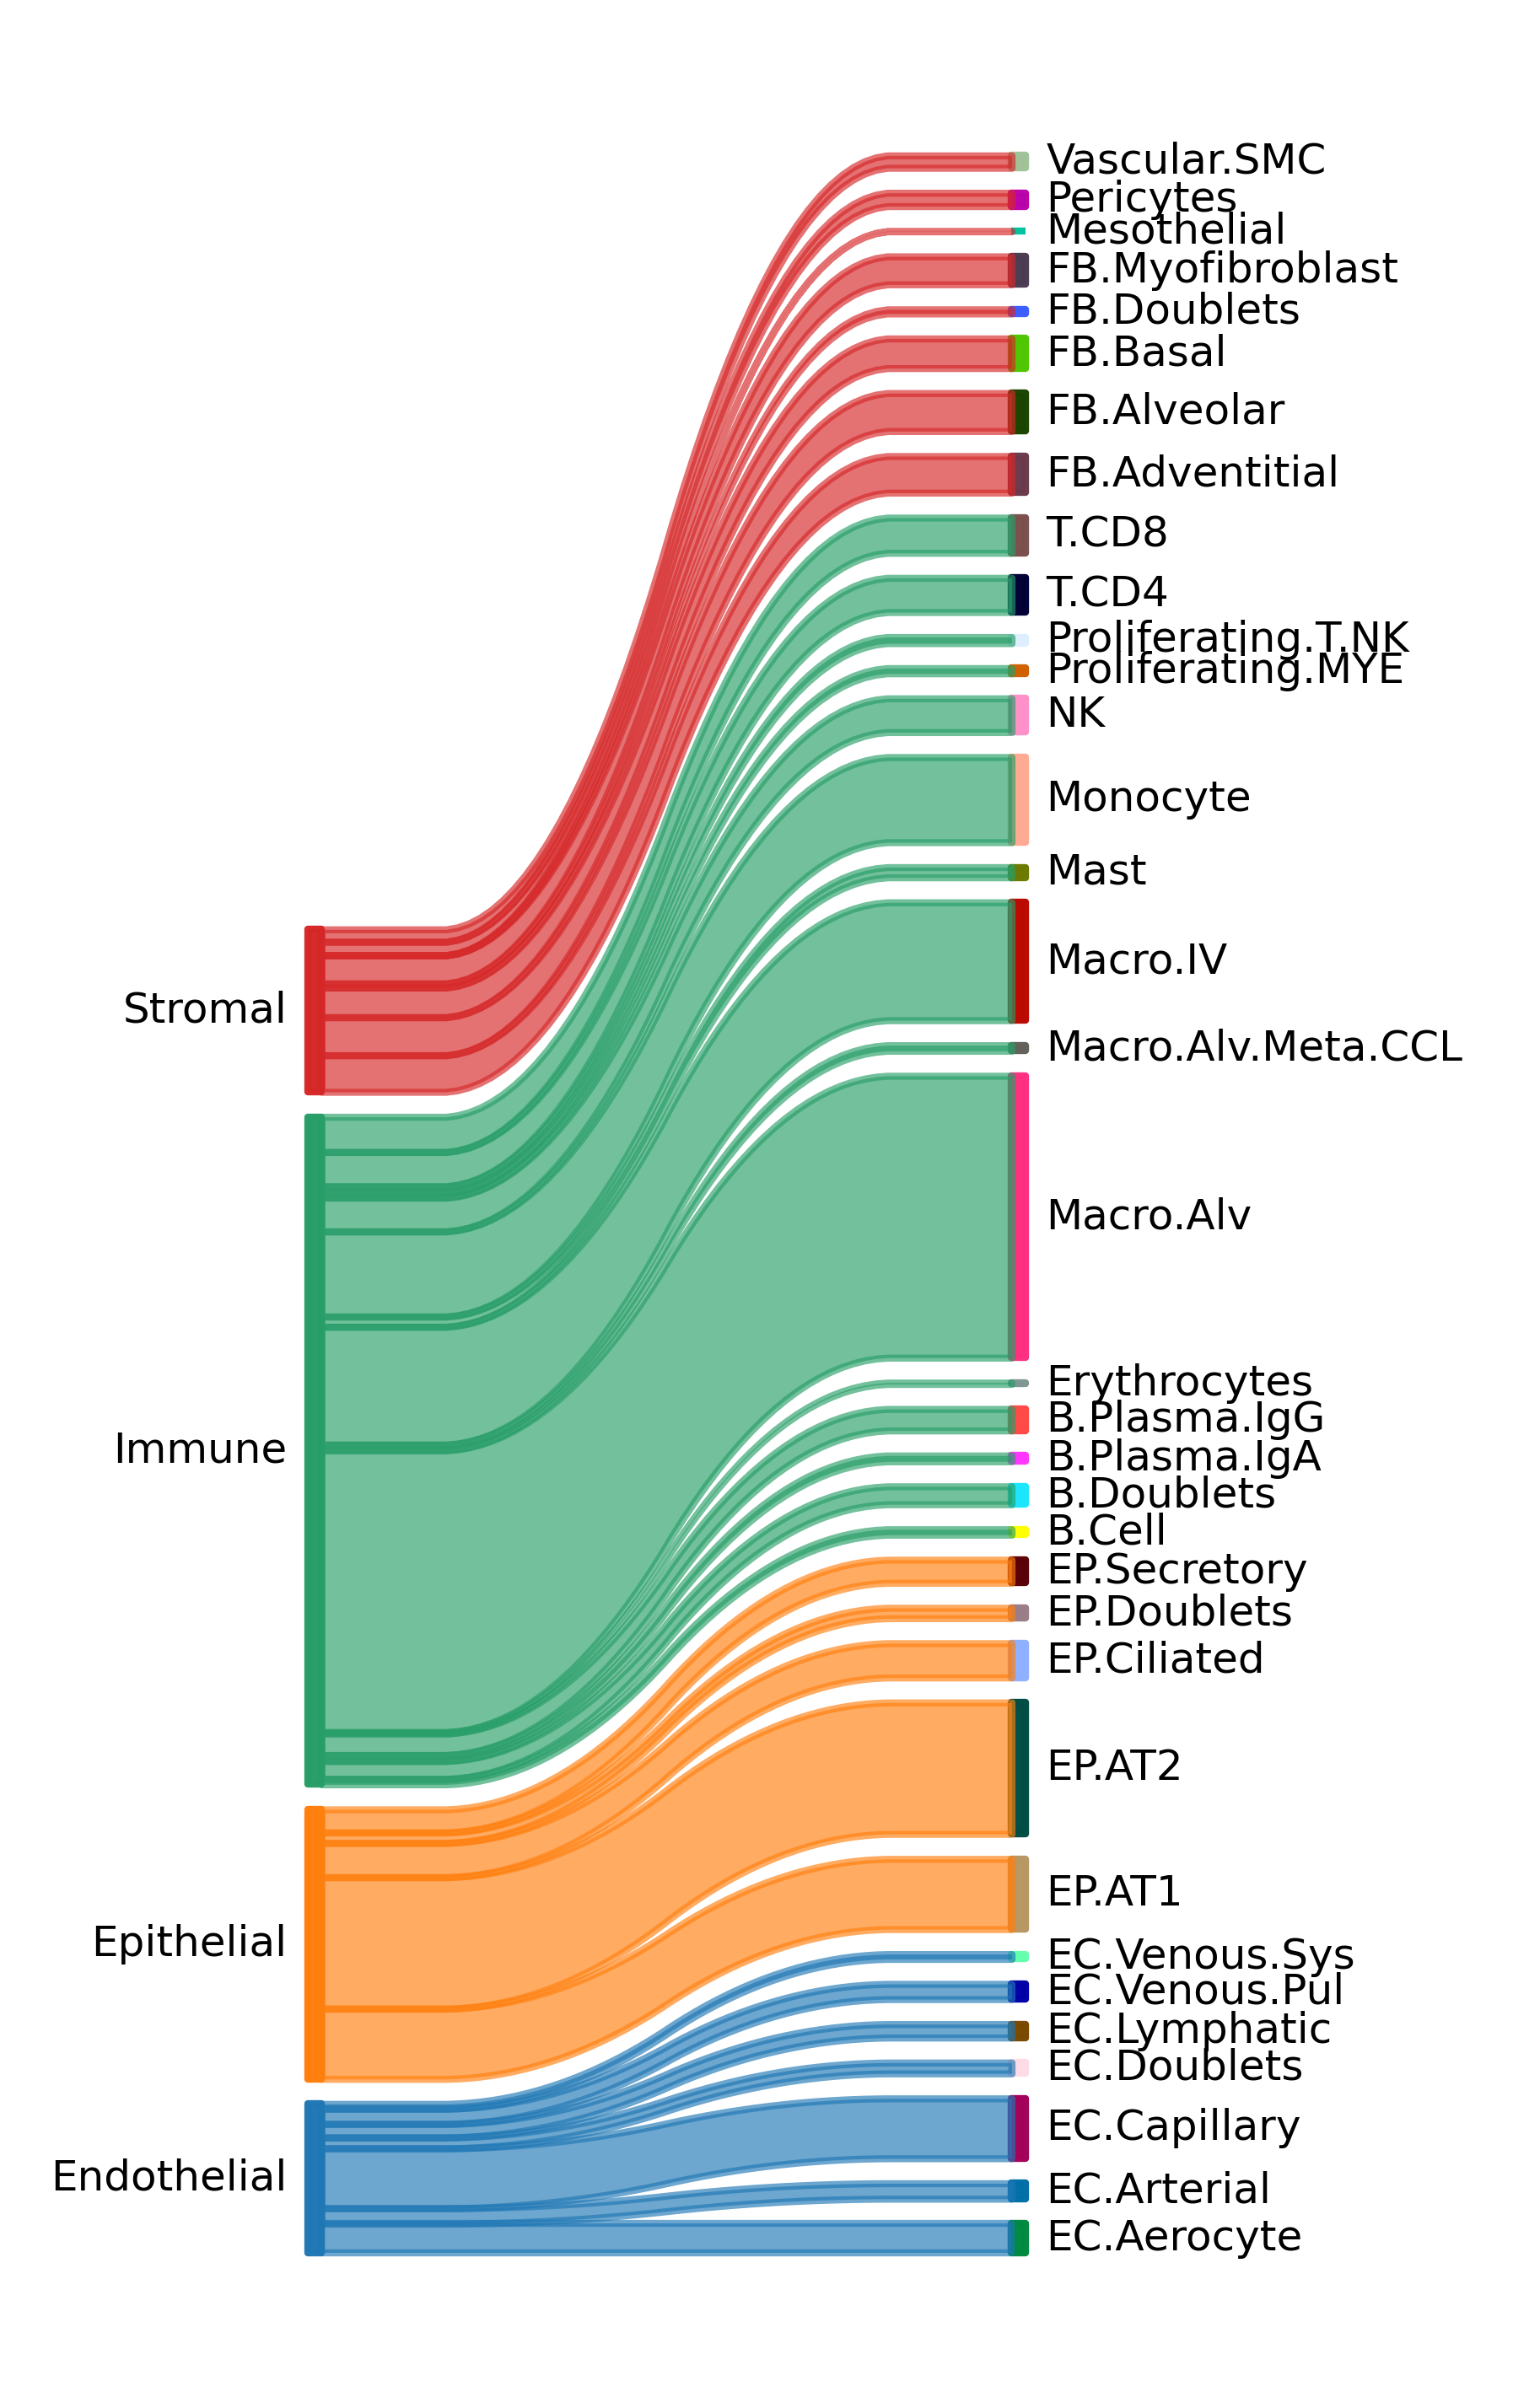

In [36]:
plt.rcParams['figure.dpi'] = 300 # change dpi to change figure size
# we use the colordict created above in the colorDict option on pySankey
sankey(df["cell_type_broad"], df["cell_states"], aspect=10, fontsize=6, colorDict=colordict)

plt.gcf().set_size_inches(2,6)
#plt.savefig('1F_sankey_cell_states.pdf',bbox_inches='tight',dpi=150)

In [30]:
anno1=adata2.obs.cell_state.tolist()
anno1=pd.DataFrame(anno1,columns=["All"])

anno2=adata2.obs.health_status.tolist()
anno2=pd.DataFrame(anno2,columns=["All"])

anno3=anno1+"_"+anno2

anno3=np.asarray(anno3)

adata2.obs["anno3"]=anno3

ec_subset = adata2[adata2.obs["cell_type"].isin(["Vascular.Endothelial.cells","Lymphatic.Endothelial.cells"])]
other_subset = adata2[adata2.obs["cell_type"].isin(["AT1","AT2","B.Plasma.cells","Ciliated","Fibroblasts","Mast","Monocyte.Macrophage","Mural.cells","Secretory","T.NK.cells"])]

ace2 = ["ACE2","TMPRSS2","CTSL"]
sc.pl.dotplot(ec_subset, ace2, "anno3", color_map = 'Purples', standard_scale = 'var')
sc.pl.dotplot(other_subset, ace2, "anno3", color_map = 'Purples', standard_scale = 'var')

sc.pl.umap(adata, color = ["ACE2"], cmap = 'Purples', size = 5, use_raw = False)

sc.pl.umap(adata, color = ["TMPRSS2"], cmap = 'Purples', size = 5, use_raw = False)

sc.pl.umap(adata, color = ["CTSL"], cmap = 'Purples', size = 5, use_raw = False)